#### **_Linear Regression_**

**Linear Regression with Mean Squared Error (MSE)**  

**1. Introduction to Linear Regression**  
Linear regression is a fundamental machine learning algorithm used to model the relationship between **input features** (independent variable) and an **output variable** (dependent variable). It assumes a **linear relationship** between variables and is commonly used for **predictive analysis**.  

**2. Goal of Linear Regression**  
The goal is to fit a straight line through the data points such that it minimizes the error. The equation of a straight line is:  
$y = m \cdot x + b$  
Where:  
- $y$: Predicted value (output)  
- $m$: Slope of the line  
- $x$: Input value (feature)  
- $b$: Intercept (bias term)  

**3. Graphical Representation of Linear Regression**  
The **X-axis** represents the input feature (e.g., study time), and the **Y-axis** represents the output variable (e.g., exam score). Data points represent the actual values, and the line $y = m \cdot x + b$ represents the predicted relationship.  

**4. Understanding Error**  
The error is the difference between the actual value $y_i$ and the predicted value $\hat{y}_i$:  
$Error = y_i - \hat{y}_i$  
Where:  
- $y_i$: Actual value of the $i^{th}$ data point  
- $\hat{y}_i$: Predicted value using $y = m \cdot x + b$  

**5. Mean Squared Error (MSE)**  
The Mean Squared Error quantifies the error between predicted and actual values:  
$E = \frac{1}{n} \sum_{i=0}^{n} \left( y_i - (m \cdot x_i + b) \right)^2$  
Where:  
- $y_i$: Actual value of the $i^{th}$ data point  
- $m \cdot x_i + b$: Predicted value for the $i^{th}$ data point  
- $n$: Total number of data points  

**6. Optimization Goal**  

The goal is to find the values of $m$ and $b$ that minimize $E$. This is done by computing the partial derivatives of $E$ with respect to $m$ and $b$.  

**7. Partial Derivative with Respect to $m$: $\frac{\partial E}{\partial m}$**  

Start with the MSE formula:  
$E = \frac{1}{n} \sum_{i=0}^{n} \left( y_i - (m \cdot x_i + b) \right)^2$  

The derivative of $E$ with respect to $m$ is:  
$\frac{\partial E}{\partial m} = \frac{-2}{n} \sum_{i=0}^{n} x_i \cdot (y_i - (m \cdot x_i + b))$  

**8. Partial Derivative with Respect to $b$: $\frac{\partial E}{\partial b}$**  

Start with the MSE formula:  
$E = \frac{1}{n} \sum_{i=0}^{n} \left( y_i - (m \cdot x_i + b) \right)^2$  

The derivative of $E$ with respect to $b$ is:  
$\frac{\partial E}{\partial b} = \frac{-2}{n} \sum_{i=0}^{n} (y_i - (m \cdot x_i + b))$  

**9. Gradient Descent Algorithm**  

To minimize $E$, the gradient descent algorithm iteratively updates $m$ and $b$ based on the gradients.  

**Update for $m$:**  
$m = m - L \cdot \frac{\partial E}{\partial m}$  

**Update for $b$:**  
$b = b - L \cdot \frac{\partial E}{\partial b}$  

Where:  
- $L$: Learning rate (e.g., $0.0001$)  
- $\frac{\partial E}{\partial m}$: Gradient of $E$ with respect to $m$  
- $\frac{\partial E}{\partial b}$: Gradient of $E$ with respect to $b$  

**10. Complete Process of Gradient Descent**  

1. Initialize $m$ and $b$ (e.g., $m = 0$, $b = 0$).  

2. Compute the gradients:  
$\frac{\partial E}{\partial m} = \frac{-2}{n} \sum_{i=0}^{n} x_i \cdot (y_i - (m \cdot x_i + b))$  
$\frac{\partial E}{\partial b} = \frac{-2}{n} \sum_{i=0}^{n} (y_i - (m \cdot x_i + b))$  

3. Update $m$ and $b$:  
$m = m - L \cdot \frac{\partial E}{\partial m}$  
$b = b - L \cdot \frac{\partial E}{\partial b}$  

4. Repeat steps 2–3 for a fixed number of iterations or until convergence.  

5. Output the final values of $m$ and $b$.  

**11. Learning Rate ($L$)**  

The learning rate $L$ controls how large a step is taken in the direction of the gradient. A small $L$ ensures gradual convergence, while a large $L$ may overshoot the minimum or fail to converge.  

**12. Graphical Intuition**  

The gradient ($\frac{\partial E}{\partial m}$ and $\frac{\partial E}{\partial b}$) points in the direction of **steepest ascent**. Gradient descent moves in the **opposite direction** to minimize $E$.  



Trained slope (m): 2.456812234652625
Trained intercept (b): 5.196946592018253


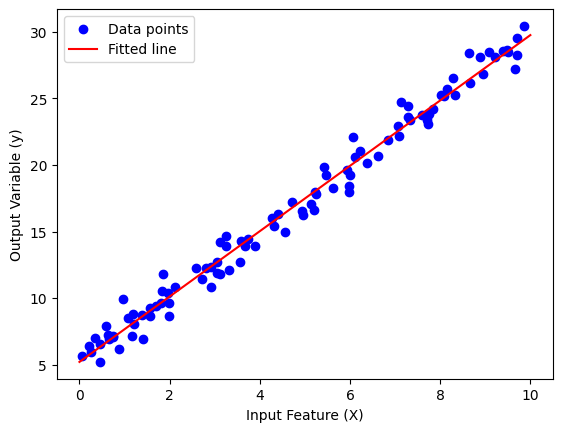

In [4]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)
X = np.random.rand(100, 1) * 10  
# Input feature (100 points between 0 and 10)
true_slope = 2.5
true_intercept = 5
noise = np.random.randn(100, 1)  # Add some noise
y = true_slope * X + true_intercept + noise  # Output variable

# Gradient Descent Implementation
def compute_gradients(X, y, m, b):
    n = len(X)
    y_pred = m * X + b
    error = y - y_pred
    dm = (-2 / n) * np.sum(X * error)
    db = (-2 / n) * np.sum(error)
    return dm, db

def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m, b = 0, 0  # Initialize slope and intercept
    for _ in range(epochs):
        dm, db = compute_gradients(X, y, m, b)
        m -= learning_rate * dm
        b -= learning_rate * db
    return m, b

# Train the model
learning_rate = 0.01
epochs = 1000
final_m, final_b = gradient_descent(X, y, learning_rate, epochs)

# Display results
print(f"Trained slope (m): {final_m}")
print(f"Trained intercept (b): {final_b}")

# Predictions and visualization
X_test = np.linspace(0, 10, 100).reshape(-1, 1)  # Test data
y_pred = final_m * X_test + final_b

plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_test, y_pred, color='red', label='Fitted line')
plt.xlabel('Input Feature (X)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()

In [5]:
# Example prediction
def predict(X, m, b):
    return m * X + b

new_data = np.array([[4], [6], [8]])  # Example input values
y_pred_new = predict(new_data, final_m, final_b)
print("Predictions for new data:", y_pred_new)

Predictions for new data: [[15.02419553]
 [19.93782   ]
 [24.85144447]]



**Linear Regression using the Ordinary Least Squares (OLS) Method**

**Step 1: Problem Definition**  
The goal is to find the best-fit line:  
$ y = mx + b $  
Where:  
- $ y $ is the dependent variable.  
- $ x $ is the independent variable.  
- $ m $ (slope) and $ b $ (intercept) are the parameters to be estimated.  

**Step 2: Hypothesis (Model)**  
For each data point $ (x_i, y_i) $, the predicted value is:  
$ \hat{y}_i = mx_i + b $  

**Step 3: Residual Sum of Squares (RSS)**  
The **Residual Sum of Squares (RSS)** measures the total squared difference between actual and predicted values:  
$ RSS = \sum_{i=1}^n (y_i - \hat{y}_i)^2 $  
Substituting $ \hat{y}_i = mx_i + b $:  
$ RSS = \sum_{i=1}^n (y_i - (mx_i + b))^2 $  
The objective is to minimize $ RSS $ to find the optimal $ m $ and $ b $.  

**Step 4: Minimize the Loss (Optimization)**  
To minimize $ RSS $, calculate the partial derivatives with respect to $ m $ and $ b $, set them to zero, and solve.

**Partial Derivative w.r.t. $ m $:**  
$ \frac{\partial RSS}{\partial m} = -2 \sum_{i=1}^n x_i \cdot (y_i - (mx_i + b)) = 0 $  

**Partial Derivative w.r.t. $ b $:**  
$ \frac{\partial RSS}{\partial b} = -2 \sum_{i=1}^n (y_i - (mx_i + b)) = 0 $  

**Step 5: Solve for $ m $ and $ b $**  
The solutions to the above equations are:

**Slope ($ m $):**  
$ m = \frac{n \sum x_i y_i - \sum x_i \sum y_i}{n \sum x_i^2 - (\sum x_i)^2} $  

**Intercept ($ b $):**  
$ b = \frac{\sum y_i - m \sum x_i}{n} $  

**Step 6: Best-Fit Line**  
Using the values of $ m $ and $ b $, the equation for the best-fit line is:  
$ \hat{y} = mx + b $  

**Step 7: Visualization**  
1. Plot the original data points $ (x_i, y_i) $.  
2. Plot the regression line $ \hat{y} = mx + b $.  
3. Optionally, visualize the residuals $ y_i - \hat{y}_i $.  

**Step 8: Interpreting RSS**  
A **lower RSS** indicates a better fit of the model to the data, while a **higher RSS** suggests a poor fit.

**Example: Applying the Formulas**  
For a dataset with the following values:  
- $ n = 5 $  
- $ \sum x_i = 15 $  
- $ \sum y_i = 25 $  
- $ \sum x_i^2 = 55 $  
- $ \sum y_i^2 = 135 $  
- $ \sum x_i y_i = 85 $  

**Compute $ m $:**  
$ m = \frac{n \sum x_i y_i - \sum x_i \sum y_i}{n \sum x_i^2 - (\sum x_i)^2} $  

**Compute $ b $:**  
$ b = \frac{\sum y_i - m \sum x_i}{n} $  

Using these values, compute $ m $ and $ b $, and plot the resulting regression line.

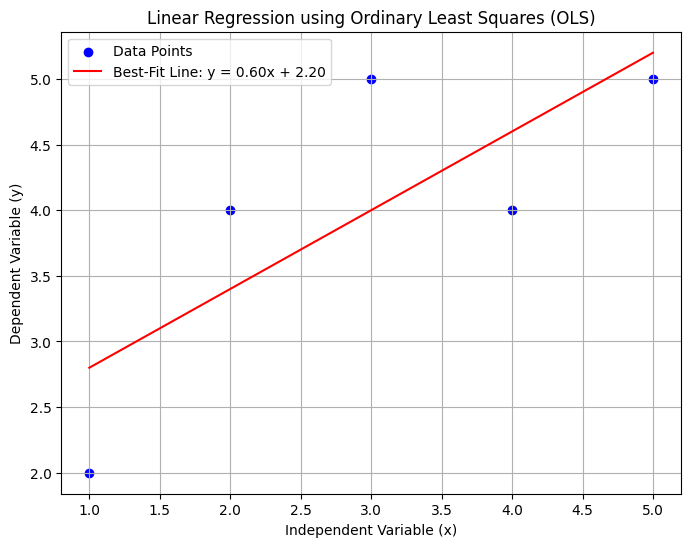

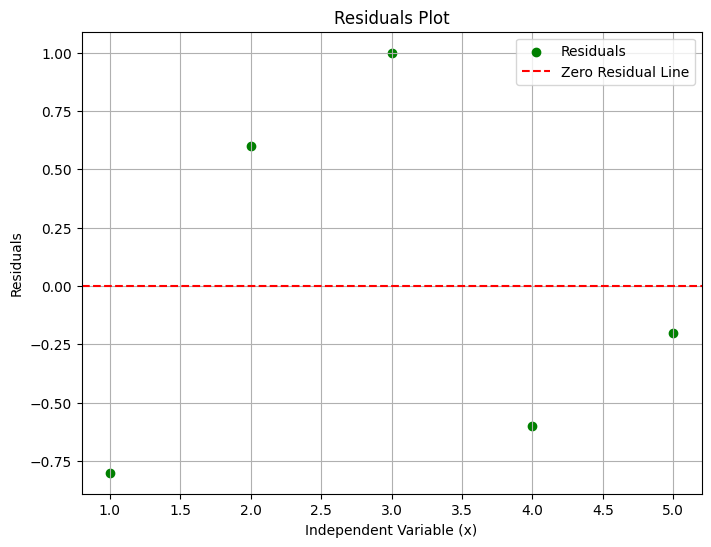

Linear Regression using Ordinary Least Squares (OLS):
Slope (m): 0.60
Intercept (b): 2.20
Residual Sum of Squares (RSS): 2.40


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# **Step 1: Problem Definition**
# Dataset (x: Independent Variable, y: Dependent Variable)
x = np.array([1, 2, 3, 4, 5])  # Independent variable
y = np.array([2, 4, 5, 4, 5])  # Dependent variable

# **Step 2: Summation Calculations**
n = len(x)  # Number of data points
sum_x = np.sum(x)  # Summation of x
sum_y = np.sum(y)  # Summation of y
sum_x2 = np.sum(x**2)  # Summation of x^2
sum_xy = np.sum(x * y)  # Summation of x * y

# **Step 3: Solve for Slope (m) and Intercept (b)**
# Using the derived formulas:
# m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - (sum_x)^2)
# b = (sum_y - m * sum_x) / n
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
b = (sum_y - m * sum_x) / n

# **Step 4: Predict the Best-Fit Line**
# The regression line equation is: y_pred = m * x + b
y_pred = m * x + b

# **Step 5: Residual Sum of Squares (RSS)**
# RSS = sum((y - y_pred)^2)
rss = np.sum((y - y_pred)**2)

# **Step 6: Visualization**
# Plotting the Data Points and Best-Fit Line
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data Points')  # Original data points
plt.plot(x, y_pred, color='red', label=f'Best-Fit Line: y = {m:.2f}x + {b:.2f}')  # Regression line
plt.xlabel('Independent Variable (x)')
plt.ylabel('Dependent Variable (y)')
plt.title('Linear Regression using Ordinary Least Squares (OLS)')
plt.legend()
plt.grid(True)
plt.show()

# Residuals Plot (Optional)
residuals = y - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(x, residuals, color='green', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.xlabel('Independent Variable (x)')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.grid(True)
plt.show()

# **Step 7: Display Results**
print("Linear Regression using Ordinary Least Squares (OLS):")
print(f"Slope (m): {m:.2f}")
print(f"Intercept (b): {b:.2f}")
print(f"Residual Sum of Squares (RSS): {rss:.2f}")
